In [11]:
import matplotlib.pyplot as plt
import numpy as np
from Q_Learning_colf import evaluate, train, make_QTables, makeEmptyTables
from extended_pd import parallel_env

In [12]:
env = parallel_env()

# Values of gamma to test
gamma_values = [0.8, 0.9, 0.95, 0.99]

# Lists to store results for each gamma
mean_rewards_list = []

In [13]:
trials = 1

tot_rew = []

for t in range(trials):

    tot_rew_per_episode = []

    for gamma in gamma_values:
        alfa = 0.01
        adecay = 0.0001
        env = parallel_env()
        observations, infos = env.reset()
        lamb = 0.1
        qtables = make_QTables(env,gamma) 
        stables = makeEmptyTables(env)
        ptables = makeEmptyTables(env)
        qtables = make_QTables(env, gamma)
        qtables, tot_rew_per_gamma = train(env, 100000, 0, 0.2, 0.000006, 100, qtables, ptables, stables, gamma, alfa, adecay, 4, lamb)
        tot_rew_per_episode.append(tot_rew_per_gamma)
    
    tot_rew.append(tot_rew_per_episode)

100%|██████████| 100000/100000 [29:40<00:00, 56.16it/s]


In [14]:
print(tot_rew)

[[[0.3466666666666667, 0.38222222222222224, 0.3900000000000001, 0.3688888888888888, 0.3477777777777776, 0.3822222222222221, 0.3666666666666667, 0.36222222222222217, 0.3511111111111109, 0.36000000000000004, 0.41222222222222227, 0.36555555555555547, 0.4166666666666665, 0.3944444444444444, 0.39333333333333326, 0.3944444444444444, 0.4044444444444444, 0.38999999999999996, 0.36999999999999994, 0.42777777777777787, 0.4011111111111112, 0.4055555555555553, 0.40777777777777774, 0.40777777777777774, 0.3944444444444442, 0.43777777777777777, 0.4199999999999999, 0.4166666666666665, 0.41555555555555523, 0.41, 0.4299999999999999, 0.40999999999999986, 0.4166666666666665, 0.4288888888888889, 0.41777777777777775, 0.4422222222222221, 0.3922222222222221, 0.3966666666666665, 0.4155555555555554, 0.40999999999999986, 0.42777777777777765, 0.411111111111111, 0.38888888888888884, 0.4122222222222222, 0.43111111111111083, 0.39666666666666667, 0.4088888888888887, 0.4177777777777776, 0.4177777777777776, 0.4355555555

In [15]:
my_array = np.array(tot_rew)

my_array.shape

(1, 4, 100000)

In [16]:
average_payoffs = np.mean(my_array, axis=0)

average_payoffs.shape

(4, 100000)

In [17]:
average_payoffs

array([[0.34666667, 0.38222222, 0.39      , ..., 0.43666667, 0.44111111,
        0.44444444],
       [0.27888889, 0.29      , 0.27555556, ..., 0.51      , 0.51444444,
        0.50888889],
       [0.21777778, 0.27888889, 0.32333333, ..., 0.97555556, 0.97555556,
        0.97888889],
       [0.23444444, 0.25666667, 0.26777778, ..., 0.48      , 0.48111111,
        0.48      ]])

In [18]:
average_payoffs = np.transpose(average_payoffs)

average_payoffs.shape

(100000, 4)

In [19]:
average_payoffs

array([[0.34666667, 0.27888889, 0.21777778, 0.23444444],
       [0.38222222, 0.29      , 0.27888889, 0.25666667],
       [0.39      , 0.27555556, 0.32333333, 0.26777778],
       ...,
       [0.43666667, 0.51      , 0.97555556, 0.48      ],
       [0.44111111, 0.51444444, 0.97555556, 0.48111111],
       [0.44444444, 0.50888889, 0.97888889, 0.48      ]])

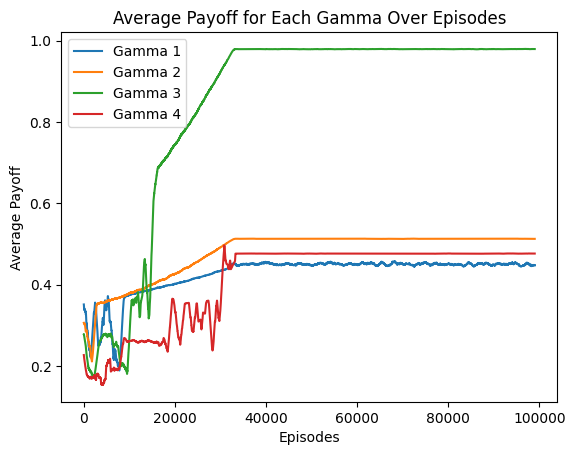

In [20]:
# Calculate the average payoff for each gamma
average_payoffs = np.mean(my_array, axis=0)

# Transpose the array for plotting
average_payoffs = np.transpose(average_payoffs)

# Set the window size for smoothing the plot
window_size = 1000

# Create a plot
fig, ax = plt.subplots()

# Plot each line for different gammas with smoothing
for i in range(average_payoffs.shape[1]):
    smoothed_values = np.convolve(average_payoffs[:, i], np.ones(window_size)/window_size, mode='valid')
    ax.plot(smoothed_values, label=f'Gamma {i+1}')

# Set labels and title
ax.set_xlabel('Episodes')
ax.set_ylabel('Average Payoff')
ax.set_title('Average Payoff for Each Gamma Over Episodes')

# Add legend
ax.legend()

# Show the plot
plt.show()